<a href="https://colab.research.google.com/github/ealmenzar/non-human-errors/blob/main/Non-Human_Errors_BiT_OxfordPet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download and set BiT model

In [48]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [49]:
!ls

gdrive	sample_data


In [ ]:
%cd /content/gdrive/Shareddrives/[PATH_TO_CONTENT_FOLDER]  # replace [PATH_TO_CONTENT_FOLDER] with the path to the folder where you want to save the content

In [ ]:
!mkdir BiT-M-R50x1-run0-oxford_iiit_pet.tfhub
%cd BiT-M-R50x1-run0-oxford_iiit_pet.tfhub
!wget https://storage.googleapis.com/bit_models/vtab/BiT-M-R50x1-run0-oxford_iiit_pet.tfhub/{saved_model.pb,tfhub_module.pb}
!mkdir variables
%cd variables
!wget https://storage.googleapis.com/bit_models/vtab/BiT-M-R50x1-run0-oxford_iiit_pet.tfhub/variables/variables.index

In [ ]:
!wget https://storage.googleapis.com/bit_models/vtab/BiT-M-R50x1-run0-oxford_iiit_pet.tfhub/variables/variables.data-00000-of-00001

In [ ]:
%cd ../
!ls

In [54]:
module_dir = "./BiT-M-R50x1-run0-oxford_iiit_pet.tfhub"

In [55]:
import tensorflow as tf
import tensorflow_hub as hub

# Load saved model
module = hub.KerasLayer(module_dir, signature='representation' , signature_outputs_as_dict=True)

In [ ]:
# Import dataset

import tensorflow_datasets as tfds

ds, info = tfds.load('oxford_iiit_pet', split=['train'], with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteG9DKWA/oxford_iiit_pet-train.tfrecord


  0%|          | 0/3680 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteG9DKWA/oxford_iiit_pet-test.tfrecord


  0%|          | 0/3669 [00:00<?, ? examples/s]

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.


In [ ]:
ds = ds[0]
num_examples = info.splits['train'].num_examples
NUM_CLASSES = 37

In [ ]:
# Split into train and test sets
# I have checked that the classes are reasonably balanced.
train_split = 0.9
num_train = int(train_split * num_examples)
ds_train = ds.take(num_train)
ds_test = ds.skip(num_train)

DATASET_NUM_TRAIN_EXAMPLES = num_examples

In [ ]:
len(ds_train)

3312

In [ ]:
# Helper functions for loading image

def preprocess_image(image):
  image = np.array(image)
  # reshape into shape [batch_size, height, width, num_channels]
  img_reshaped = tf.reshape(image, [1, image.shape[0], image.shape[1], image.shape[2]])
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  image = tf.image.convert_image_dtype(img_reshaped, tf.float32)  
  return image

In [ ]:
# Label names
tf_labels = info.features['label'].names

In [ ]:
len(info.features['label'].names)

37

# Taxonomy

In [ ]:
!mkdir BiT
%cd BiT
!makdir anytree
%cd anytree

In [ ]:
!git clone https://github.com/ealmenzar/anytree.git
#!git pull origin master
!python setup.py install

From https://github.com/ealmenzar/anytree
 * branch            master     -> FETCH_HEAD
Already up to date.
running install
running bdist_egg
running egg_info
writing anytree.egg-info/PKG-INFO
writing dependency_links to anytree.egg-info/dependency_links.txt
writing requirements to anytree.egg-info/requires.txt
writing top-level names to anytree.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'anytree.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/anytree
copying build/lib/anytree/dotexport.py -> build/bdist.linux-x86_64/egg/anytree
copying build/lib/anytree/__init__.py -> build/bdist.linux-x86_64/egg/anytree
copying build/lib/anytree/render.py -> build/bdist.linux-x86_64/egg/anytree
copying build/lib/anytree/cachedsearch.py -> build/bdist.linux-x86_64/egg/anytree
copying build/

In [ ]:
tf_labels

['Abyssinian',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'Bengal',
 'Birman',
 'Bombay',
 'boxer',
 'British_Shorthair',
 'chihuahua',
 'Egyptian_Mau',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'Maine_Coon',
 'miniature_pinscher',
 'newfoundland',
 'Persian',
 'pomeranian',
 'pug',
 'Ragdoll',
 'Russian_Blue',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'Siamese',
 'Sphynx',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

In [ ]:
import numpy as np

label_array = np.array([33, 1, 8, 17, 18, 30, 27, 36, 2, 31, 22, 32, 21, 19, 20, 3, 23, 24, 13, 4, 29, 5, 6, 26, 14, 25, 28, 34, 7, 15, 9, 16, 37, 35, 10, 11, 12])
label_array = label_array - 1
label_array

array([32,  0,  7, 16, 17, 29, 26, 35,  1, 30, 21, 31, 20, 18, 19,  2, 22,
       23, 12,  3, 28,  4,  5, 25, 13, 24, 27, 33,  6, 14,  8, 15, 36, 34,
        9, 10, 11])

In [ ]:
from anytree import Node

cats_dogs = Node("Cats&Dogs")

#DOG
dog = Node("dog", parent=cats_dogs)

# DOG - GROUP 2
dog2 = Node("dog-2", parent=dog)
american_bulldog = Node("american_bulldog", parent=dog2)                    # 1 - 
boxer = Node("boxer", parent=dog2)                                          # 2 -
great_pyrenees = Node("great_pyrenees", parent=dog2)                        # 3 -
leonberger = Node("leonberger", parent=dog2)                                # 4 -
miniature_pinscher = Node("miniature_pinscher", parent=dog2)                # 5 -
newfoundland = Node("newfoundland", parent=dog2)                            # 6 -
saint_bernard = Node("saint_bernard", parent=dog2)                          # 7 -

# DOG - GROUP 3
dog3 = Node("dog-3", parent=dog)
american_pit_bull_terrier = Node("american_pit_bull_terrier", parent=dog3)  # 8 - 
scottish_terrier = Node("scottish_terrier", parent=dog3)                    # 9 -
staffordshire_bull_terrier = Node("staffordshire_bull_terrier", parent=dog3)# 10 -
wheaten_terrier = Node("wheaten_terrier", parent=dog3)                      # 11 -
yorkshire_terrier = Node("yorkshire_terrier", parent=dog3)                  # 12

# DOG - GROUP 5
dog5 = Node("dog-5", parent=dog)
keeshond = Node("keeshond", parent=dog5)                                    # 13 -
pomeranian = Node("pomeranian", parent=dog5)                                # 14 -
samoyed = Node("samoyed", parent=dog5)                                      # 15 -
shiba_inu = Node("shiba_inu", parent=dog5)                                  # 16 -

# DOG - GROUP 6
dog6 = Node("dog-6", parent=dog)
basset_hound = Node("basset_hound", parent=dog6)                            # 17 -
beagle = Node("beagle", parent=dog6)                                        # 18 -

# DOG - GROUP 7
dog7 = Node("dog-7", parent=dog)
english_setter = Node("english_setter", parent=dog7)                        # 19 -
german_shorthaired = Node("german_shorthaired", parent=dog7)                # 20 -

# DOG - GROUP 8
dog8 = Node("dog-8", parent=dog)
english_cocker_spaniel = Node("english_cocker_spaniel", parent=dog8)        # 21 -

# DOG - GROUP 9
dog9 = Node("dog-9", parent=dog)
chihuahua = Node("chihuahua", parent=dog9)                                  # 22 -
havanese = Node("havanese", parent=dog9)                                    # 23 -
japanese_chin = Node("japanese_chin", parent=dog9)                          # 24 -
pug = Node("pug", parent=dog9)                                              # 25 -

# CAT
cat = Node("cat", parent=cats_dogs)

# CAT - GROUP 1A
cat1A = Node("cat-1A", parent=cat)
Persian = Node("Persian", parent=cat1A)                                     # 26 -

# CAT - GROUP 1B
cat1B = Node("cat-1B", parent=cat)
Birman = Node("Birman", parent=cat1B)                                       # 27 - 
Ragdoll = Node("Ragdoll", parent=cat1B)                                     # 28 -

# CAT - GROUP 2
cat2 = Node("cat-2", parent=cat)
Maine_Coon = Node("Maine_Coon", parent=cat2)                                # 29 -

# CAT - GROUP 3
cat3 = Node("cat-3", parent=cat)
Bengal = Node("Bengal", parent=cat3)                                        # 30 -
British_Shorthair = Node("British_Shorthair", parent=cat3)                  # 31 -
Egyptian_Mau = Node("Egyptian_Mau", parent=cat3)                            # 32 -

# CAT - GROUP 4C
cat4C = Node("cat-4C", parent=cat)
Abyssinian = Node("Abyssinian", parent=cat4C)                               # 33 -
Russian_Blue = Node("Russian_Blue", parent=cat4C)                           # 34 -
Sphynx = Node("Sphynx", parent=cat4C)                                       # 35 -
Bombay = Node("Bombay", parent=cat4C)                                       # 36 -

# CAT - GROUP 4D
cat4D = Node("cat-4D", parent=cat)
Siamese = Node("Siamese", parent=cat4D)                                     # 37 -

# Obtain results

In [ ]:
# Plotting helper functions
# Credits to Xiaohua Zhai, Lucas Beyer and Alex Kolesnikov from Brain Zurich, Google Research

# Show the MAX_PREDS highest scoring labels:
MAX_PREDS = 6
# Do not show labels with lower score than this:
MIN_SCORE = 0.5 

from anytree import Walker
from anytree import find_by_attr


def show_preds(logits, image, matrix, correct_label=None, tf_logits=False):
  if len(logits.shape) > 1:
      logits = tf.reshape(logits, [-1])
  sorted_logits = np.argsort(logits)[-MAX_PREDS::][::-1]
  d = 0
  scr = 0
  if(sorted_logits[0] != correct_label):                          # only if an error is found, plot
    s = find_by_attr(cats_dogs, tf_labels[sorted_logits[0]])
    if s is None: print(tf_labels[sorted_logits[0]])
    e = find_by_attr(cats_dogs, tf_labels[correct_label])
    if e is None: print(tf_labels[correct_label])
    w = Walker()
    d = w.distance(s, e)
    prd = label_array[sorted_logits[0]]
    orig = label_array[correct_label]
    #matrix[prd][orig] += 1
    matrix[orig][prd] += 1
    fig, axes = plt.subplots(1, 2, figsize=(7, 4), squeeze=False)
    ax1, ax2 = axes[0]
    ax1.axis('off')
    ax1.imshow(image)
    
    if correct_label is not None:
      ax1.set_title(tf_labels[correct_label]+" ("+str(d)+")")

    classes = []
    scores = []
    scores2 = []
    logits_max = np.max(logits)
    softmax_denominator = np.sum(np.exp(logits - logits_max))
    for index, j in enumerate(np.argsort(logits)[-MAX_PREDS::][::-1]):
      score = 1.0/(1.0 + np.exp(-logits[j]))
      if score < MIN_SCORE: break
      if not tf_logits:
        # predicting in imagenet label space
        classes.append(imagenet_int_to_str[j])
      else:
        # predicting in the label space
        sc = round(np.exp(logits[j] - logits_max)/softmax_denominator*100, 2)
        classes.append(tf_labels[j]+" ("+str(sc)+"%)")
      scores.append(np.exp(logits[j] - logits_max)/softmax_denominator*100)
      scores2.append(score*100)
      #scores3.append(np.exp(logits[j] - logits_max)/softmax_denominator*100)
      scr = scores[0]
      
      ax2.barh(np.arange(len(scores)) + 0.1, scores)
      # ax2.barh(np.arange(len(scores2)) + 0.1, scores2)
      ax2.set_xlim(0, 100)
      ax2.set_yticks(np.arange(len(scores)))
      ax2.yaxis.set_ticks_position('right')
      ax2.set_yticklabels(classes, rotation=0, fontsize=14)
      ax2.invert_xaxis()
      ax2.invert_yaxis()
      ax2.set_xlabel('Prediction probabilities', fontsize=11)
      
      #plt.savefig(tf_labels[sorted_logits[0]]+"_"+tf_labels[correct_label]+"_"+str(int(scores[0]))+".png", bbox_inches='tight')
      #plt.show()  # ok
      plt.close(fig)
  
  return d, scr
    

In [ ]:
%pwd

'/content/gdrive/Shareddrives/[UPF]ThesisMarina/BiT/anytree'

In [ ]:
%cd ../
!makdir results
%cd results

/content/gdrive/Shareddrives/[UPF]ThesisMarina/BiT/results


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 37
errors_matrix = np.zeros((N,N))

# Visualise predictions from new model
errors = []
scores = []
for features in ds_train.take(3312):  # 3312
  image = features['image']
  image = preprocess_image(image)

  # Run model on image
  logits = module(image)

  # Show image and predictions
  d, score = show_preds(logits['logits'], image[0], errors_matrix, correct_label=features['label'].numpy(), tf_logits=True)
  if d is not 0: errors.append(d)
  if score is not 0: scores.append(score)

In [ ]:
sorted_labels = ["" for x in range(37)]
print(len(sorted_labels))
j = 0
for i in label_array:
  sorted_labels[i] = tf_labels[j]
  j += 1

sorted_labels

37


['american_bulldog',
 'boxer',
 'great_pyrenees',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'saint_bernard',
 'american_pit_bull_terrier',
 'scottish_terrier',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier',
 'keeshond',
 'pomeranian',
 'samoyed',
 'shiba_inu',
 'basset_hound',
 'beagle',
 'english_setter',
 'german_shorthaired',
 'english_cocker_spaniel',
 'chihuahua',
 'havanese',
 'japanese_chin',
 'pug',
 'Persian',
 'Birman',
 'Ragdoll',
 'Maine_Coon',
 'Bengal',
 'British_Shorthair',
 'Egyptian_Mau',
 'Abyssinian',
 'Russian_Blue',
 'Sphynx',
 'Bombay',
 'Siamese']

In [ ]:
errors_matrix.size
#errors_matrix

1369

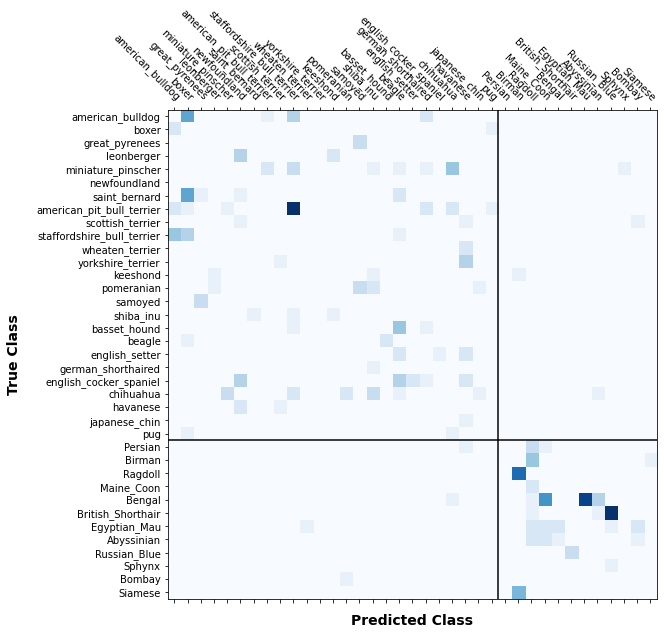

In [ ]:
cfig, ax = plt.subplots(figsize=(10,9)) 
ax.matshow(errors_matrix, cmap=plt.cm.Blues)
ax.set_xticks(np.arange(0, 37))
ax.set_xticklabels(sorted_labels)
ax.set_ylabel("True Class", fontweight='bold', fontsize=14, labelpad=15)
ax.set_xlabel("Predicted Class", fontweight='bold', fontsize=14, labelpad=15)
plt.setp(ax.get_xticklabels(), rotation=-45, ha="right",
         rotation_mode="anchor")
ax.set_yticks(np.arange(0, 37))
ax.set_yticklabels(sorted_labels)
plt.axvline(x=24.5, color='black')
plt.axhline(y=24.5, color='black')
#fig.colorbar(ax)